# Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações adicionais

In [2]:
plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

# Carregando o banco de dados

In [3]:
banco = pd.read_excel("dataset.xlsx")

In [4]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             570 non-null    int64  
 1   Place          570 non-null    object 
 2   Cod_cycle      570 non-null    int64  
 3   Zone           570 non-null    int64  
 4   cota           570 non-null    float64
 5   prof_local(m)  570 non-null    float64
 6   Mes            570 non-null    int64  
 7   Year           570 non-null    int64  
 8   Temp           564 non-null    float64
 9   TotalP         570 non-null    float64
 10  Chl            570 non-null    float64
 11  Secchi         570 non-null    float64
 12  Turbidity      570 non-null    float64
 13  STS            570 non-null    float64
 14  DO             570 non-null    float64
 15  OrthoP (mg/L)  550 non-null    float64
 16  Ammonium       570 non-null    float64
dtypes: float64(11), int64(5), object(1)
memory usage: 75.8

In [5]:
banco["Zone"].value_counts()

0    202
1    195
2    173
Name: Zone, dtype: int64

## Valores nulos

In [6]:
banco.isnull().sum()

ID                0
Place             0
Cod_cycle         0
Zone              0
cota              0
prof_local(m)     0
Mes               0
Year              0
Temp              6
TotalP            0
Chl               0
Secchi            0
Turbidity         0
STS               0
DO                0
OrthoP (mg/L)    20
Ammonium          0
dtype: int64

In [7]:
banco = banco.dropna()

# Exploratória

In [8]:
banco.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,547.0,311.702011,179.804678,1.00,158.000,308.00,467.500,630.00
Cod_cycle,547.0,1.488117,1.109956,0.00,1.000,1.00,2.000,3.00
Zone,547.0,0.959781,0.817746,0.00,0.000,1.00,2.000,2.00
cota,547.0,68.173236,5.276614,57.68,62.770,70.10,73.410,74.00
prof_local(m),547.0,28.818410,16.906395,2.60,16.200,24.80,37.000,73.00
Mes,547.0,6.700183,3.501656,1.00,4.000,7.00,10.000,12.00
Year,547.0,2010.851920,3.065525,2006.00,2008.000,2011.00,2013.500,2016.00
Temp,547.0,30.061426,0.908039,26.30,29.500,30.00,30.600,33.40
TotalP,547.0,24.137715,17.873046,3.11,13.550,19.63,29.320,195.59
Chl,547.0,6.549049,4.658414,0.71,3.570,5.35,8.090,36.90


<Figure size 720x432 with 0 Axes>

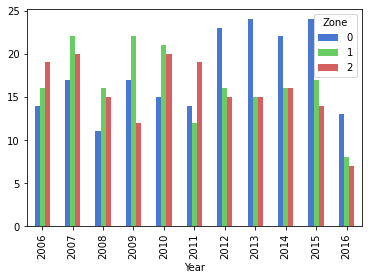

In [9]:
# banco.groupby("Year")[["Year", "Zone"]].head(6)

plt.figure(figsize = [10, 6])

banco[["Year", "Zone"]].reset_index().groupby(["Year", "Zone"], as_index = False).size().unstack().plot.bar()

plt.show()

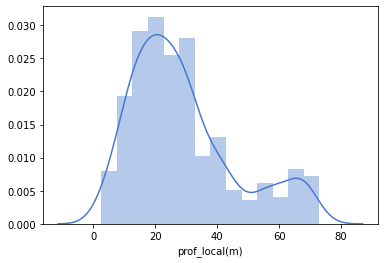

In [10]:
sns.distplot(banco["prof_local(m)"])

In [11]:
# banco["Year1"] = banco["Year"].map(lambda x: 0 if x <= 2011 else 1)


# cota	prof_local(m)	Mes	Year	Temp	TotalP	Chl	Secchi	Turbidity	STS	DO	OrthoP (mg/L)	Ammonium	

# prof_local, secchi

# sns.boxplot(x = "Year1", y = "prof_local(m)", hue = "Zone", data = banco)

## Criando novas variáveis

In [12]:
#--- Turbidez pela profundidade (divisão)

# banco["relation_turbidity_profund"] = banco["Turbidity"]/banco["prof_local(m)"]


#--- TotalP/amanium

# banco["relation_fosforoT_amonia"] = banco["TotalP"]/banco["Ammonium"]


# #--- DO/profundidade (Boa variável)

banco["relation_DO_profund"] = banco["DO"]/banco["prof_local(m)"]


# #--- STS/profundidade

# banco["relation_STS_profund"] = banco["STS"]/banco["prof_local(m)"]


#--- STS/Turbidez

# banco["relation_STS_turbidity"] = banco["STS"]/banco["Turbidity"]


#--- Fósforo total/Clorofila


# banco["relation_TotalP_Chl"] = banco["TotalP"]/banco["Chl"]


#--- log(Transparência) / log(Turbidez)

# #banco["relation_Secchi_Turbidity"] = banco["Secchi "]/banco["Turbidity"]

# Resultado: Boa mas não bate a de cima o suficiente


#--- log(Transparência) / log(STS)

# banco["relation_Secchi_Turbidity"] = banco["Secchi "]/banco["STS"]

# Resultado: Não foi util


#--- Meses divididos em semestres

# banco["Mes"] = banco["Mes"].map(lambda x: 0 if x <= 6 else 1)

# Resultados: Nenhuma transformação em meses ou anos são úteis


#--- Meses divididos em períodos de verão/inverno

# banco["Mes1"] = banco["Mes"].map(lambda x: 0 if x >= 6 and x <=10 else 1)

# 0: verão
# 1: inverno

# Resultados: Nenhuma transformação em meses ou anos são úteis


#--- Dividir a profundidade em 4 quartis

# banco["prof_local_quant"] = pd.cut(banco["prof_local(m)"], 4, labels = [1, 2, 3, 4])

# Resultado: Não foi útil


#--- Log na OD

# banco["DO"] = np.log(banco["DO"])

# Resultado: Não foi útil


#--- Polynomial features


# var_poly = ["cota", "prof_local(m)", "Temp", "TotalP", "Chl", "Secchi ", "Turbidity", "STS", "DO", "OrthoP (mg/L)", "Ammonium",
#       "relation_DO_profund"]

# novas_colunas = [i + "_2poly" for i in var_poly]


# banco[novas_colunas] = banco[var_poly] ** 2


# Resultado: Não houve melhora


#--- Ainda tentando criar variáveis com anos

banco["Year1"] = banco["Year"].map(lambda x: 1 if x <= 2011 else 0)

# 1: Anos <= 2011
# 0: else 


banco["Mes1"] = banco["Mes"].map(lambda x: 1 if x >= 6 and x <= 10 else 0)

# 1: Período chuvoso
# 0: Período não chuvoso


#--- Turismo

# banco["Mes2"] = banco["Mes"].map(lambda x: 1 if x >= 5 and x <= 10 else 0)


# --- Ferias

# banco["Mes3"] = banco["Mes"].map(lambda x: 1 if x in (1, 6, 7, 8, 12) else 0)


# sns.boxplot(x = "Mes1", y = "prof_local(m)", hue = "Zone", data = banco)

# cota	prof_local(m)	Temp	TotalP	Chl	Secchi	Turbidity	STS	DO	OrthoP (mg/L)	Ammonium	relation_DO_profund

# plt.show()



#--- Fazendo uma relação entre Year1 e prof_local

# prof_local, secchi

# 0: Lacustre
# 1: Transição
# 2: Fluvial

# banco["Teste"] = banco["Year1"].astype(str) + pd.qcut(banco["cota"], 4, labels = ["Q1", "Q2", "Q3", "Q4"]).astype(str)
# banco["Teste1"] = banco["Year1"].astype(str) + pd.qcut(banco["cota"], 4, labels = ["Q1", "Q2", "Q3", "Q4"]).astype(str)


banco.head()

,ID,Place,Cod_cycle,Zone,cota,prof_local(m),Mes,Year,Temp,TotalP,Chl,Secchi,Turbidity,STS,DO,OrthoP (mg/L),Ammonium,relation_DO_profund,Year1,Mes1
0,1,C1,2,0,73.86,30.00,4,2012,30.4,15.34,4.76,3.0,2.18,1.0,7.30,16.18,35.39,0.243333,0,0
1,2,C1,2,0,73.86,30.00,4,2013,30.2,18.91,4.05,2.1,2.96,0.6,5.86,15.81,23.50,0.195333,0,0
2,3,C1,2,0,73.69,30.00,4,2014,29.5,20.70,5.95,2.5,2.90,2.8,6.56,5.44,75.84,0.218667,0,0
3,4,C1,2,0,73.67,30.40,4,2015,31.6,19.94,5.95,1.2,10.10,0.6,7.82,9.51,23.50,0.257237,0,0
4,7,C1,1,0,62.58,19.17,12,2006,29.8,5.79,3.45,2.6,1.52,2.0,6.05,0.24,12.91,0.315597,1,0


## OneHotEncoding para as variável categóricas

In [13]:
banco = pd.get_dummies(data = banco, columns = ["Mes", "Year"])

## Selecionando variáveis

In [14]:
# var = ["Zone", "prof_local(m)", "Temp", "TotalP", "Chl", "Secchi ", "Turbidity", "STS", "DO", "OrthoP (mg/L)", "Ammonium"]

# banco[var]


banco = banco.drop(["ID", "Place", "Cod_cycle"], axis = 1)

In [15]:
x = banco.drop("Zone", axis = 1)
y = banco["Zone"]

banco.head()

,Zone,cota,prof_local(m),Temp,TotalP,Chl,Secchi,Turbidity,STS,DO,OrthoP (mg/L),Ammonium,relation_DO_profund,Year1,Mes1,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,0,73.86,30.00,30.4,15.34,4.76,3.0,2.18,1.0,7.30,16.18,35.39,0.243333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,73.86,30.00,30.2,18.91,4.05,2.1,2.96,0.6,5.86,15.81,23.50,0.195333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,73.69,30.00,29.5,20.70,5.95,2.5,2.90,2.8,6.56,5.44,75.84,0.218667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,73.67,30.40,31.6,19.94,5.95,1.2,10.10,0.6,7.82,9.51,23.50,0.257237,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,62.58,19.17,29.8,5.79,3.45,2.6,1.52,2.0,6.05,0.24,12.91,0.315597,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [16]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

# var = ["cota", "prof_local(m)", "Temp", "TotalP", "Chl", "Secchi ", "Turbidity", "STS", "DO", "OrthoP (mg/L)", "Ammonium"]

# features = banco[var]

# ct = ColumnTransformer([
#         ('somename', StandardScaler(), var)
#     ], remainder='passthrough')

# banco[var] = ct.fit_transform(features)

# banco = pd.concat([banco[var], banco["Zone"]], axis = 1)

# banco.head()

## Separando em treino e teste

In [17]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size = 0.7, random_state = 1234)

In [18]:
x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((382, 37), (382,), (165, 37), (165,))

In [19]:
print(15*"---")

print("Proporção da variável target nos dados de treino:\n", y_treino.value_counts(normalize = True))

print(15*"---")

print("Proporção da variável target nos dados de treino:\n", y_teste.value_counts(normalize = True))

---------------------------------------------
Proporção da variável target nos dados de treino:
 0    0.353403
1    0.337696
2    0.308901
Name: Zone, dtype: float64
---------------------------------------------
Proporção da variável target nos dados de treino:
 0    0.357576
2    0.327273
1    0.315152
Name: Zone, dtype: float64


## Modelos

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


#--- Random Forest

rfc = RandomForestClassifier(n_estimators = 100, 
                             random_state = 1234, 
                             n_jobs = -1)

# 'test_accuracy': array([1.        , 1.        , 1.        , 0.94117647, 1.        ,
#         1.        , 0.9375    , 1.        , 1.        , 0.9375    ])}


#--- Regressão logística 

# rfc = LogisticRegression(random_state = 1234, n_jobs = -1)

# 'test_accuracy': array([0.88235294, 0.94117647, 0.82352941, 0.88235294, 0.94117647,
#         0.8125    , 0.8125    , 0.8125    , 0.8125    , 0.8125    ])}


#--- SVC


# rfc = SVC()

# 'test_accuracy': array([0.64705882, 0.52941176, 0.64705882, 0.58823529, 0.58823529,
#         0.3125    , 0.5625    , 0.5625    , 0.375     , 0.5625    ])}


#--- KNN

# rfc = KNeighborsClassifier(n_neighbors = 15)

# 'test_accuracy': array([0.42857143, 0.64285714, 0.5       , 0.42857143, 0.2962963 ,
#         0.40740741, 0.66666667, 0.37037037, 0.55555556, 0.51851852])}

# # Gaussian Naive Bayes

# rfc = GaussianNB()

# 'test_accuracy': array([0.71428571, 0.64285714, 0.75      , 0.64285714, 0.66666667,
#         0.48148148, 0.7037037 , 0.81481481, 0.7037037 , 0.7037037 ])}


# Perceptron

# rfc = Perceptron()

# 'test_accuracy': array([0.46428571, 0.32142857, 0.32142857, 0.32142857, 0.33333333,
#         0.2962963 , 0.33333333, 0.2962963 , 0.37037037, 0.2962963 ])}


# Linear SVC

# rfc = LinearSVC(max_iter = 500)

# test_accuracy': array([0.42857143, 0.57142857, 0.5       , 0.42857143, 0.51851852,
#         0.37037037, 0.44444444, 0.59259259, 0.48148148, 0.48148148])}


# Stochastic Gradient Descent

# rfc = SGDClassifier()

# 'test_accuracy': array([0.39285714, 0.39285714, 0.39285714, 0.35714286, 0.33333333,
#         0.40740741, 0.33333333, 0.59259259, 0.44444444, 0.37037037])}


# Decision Tree

# rfc = DecisionTreeClassifier(random_state = 1234)

# 'test_accuracy': array([0.75      , 0.64285714, 0.53571429, 0.64285714, 0.59259259,
#         0.40740741, 0.59259259, 0.66666667, 0.55555556, 0.74074074])}


rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

## Cross Validation


In [21]:
%%time

from sklearn.model_selection import cross_validate 

scoring1 = [
     "accuracy"]

scores = cross_validate(rfc, x_teste, y_teste, cv = 3, scoring = scoring1, n_jobs = -1)

# print("Os scores são:", scores)

# print("Média dos scores:", scores.mean())

Wall time: 4.37 s


In [22]:
scores

{'fit_time': array([0.53086901, 0.45988965, 0.44488907]),
 'score_time': array([0.15396404, 0.15795851, 0.12596869]),
 'test_accuracy': array([0.61818182, 0.63636364, 0.61818182])}

## RandomSearch + CV

In [23]:
#--- Parametros a serem utilizados

parametros = {"max_depth" : [10, 30, 50, 70, 90, None], 
"max_features" : [10, 30, 50, 70, 90, None], 
"max_leaf_nodes" : [10, 30, 50, 70, 90, None], 
"max_samples" : [10, 30, 50, 70, 90, None], 
"min_samples_leaf" : [10, 30, 50, 70, 90, None], 
"min_samples_split" : [10, 30, 50, 70, 90, None]}

#--- Criando o objeto

from sklearn.model_selection import RandomizedSearchCV


clf = RandomizedSearchCV(rfc, parametros, random_state = 1234, n_iter = 100, cv = 3, verbose = 0, n_jobs = -1,
                         scoring = "accuracy")

In [24]:
%%time

best_model = clf.fit(x_treino, y_treino)

Wall time: 23.2 s


In [25]:
best_model.best_params_

{'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 30,
 'max_depth': 10}

In [26]:
y_pred = clf.predict(x_teste)

## Random Forest aplicado aos dados de teste

In [27]:
rfc.fit(x_treino, y_treino)

y_pred = rfc.predict(x_teste)

# Métricas a serem avaliadas


In [28]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_teste, y_pred)

print("Accuracy:", acc)

Accuracy: 0.7393939393939394


In [29]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, y_pred))

[[38 18  3]
 [10 37  5]
 [ 0  7 47]]


In [30]:
pd.crosstab(y_teste, y_pred, rownames = ["True"], colnames = ["Predicted"], margins = True)

Predicted,0,1,2,All
True,,,,
0,38,18,3,59
1,10,37,5,52
2,0,7,47,54
All,48,62,55,165


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_pred))


# 0: Fluvial, 1: Lacustre e 2: Transição

              precision    recall  f1-score   support

           0       0.79      0.64      0.71        59
           1       0.60      0.71      0.65        52
           2       0.85      0.87      0.86        54

    accuracy                           0.74       165
   macro avg       0.75      0.74      0.74       165
weighted avg       0.75      0.74      0.74       165



In [32]:
pd.DataFrame(rfc.feature_importances_, x_teste.columns).reset_index().rename(columns = {0: "Valor", "index": "Variável"}).sort_values("Valor", ascending = False).round(5)

,Variável,Valor
1,prof_local(m),0.10979
5,Secchi,0.10103
11,relation_DO_profund,0.09620
7,STS,0.09261
3,TotalP,0.06744
4,Chl,0.06276
2,Temp,0.06057
8,DO,0.05761
6,Turbidity,0.05740
0,cota,0.05008
